### Description
### Background and Context

You are a Data Scientist for a tourism company named "Visit with us". The Policy Maker of the company wants to enable and establish a viable business model to expand the customer base.

A viable business model is a central concept that helps you to understand the existing ways of doing the business and how to change the ways for the benefit of the tourism sector.

One of the ways to expand the customer base is to introduce a new offering of packages.

Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages.

However, the marketing cost was quite high because customers were contacted at random without looking at the available information.

The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being.

However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.

You as a Data Scientist at "Visit with us" travel company have to analyze the customers' data and information to provide recommendations to the Policy Maker and Marketing Team and also build a model to predict the potential customer who is going to purchase the newly introduced travel package.

### Objective

To predict which customer is more likely to purchase the newly introduced travel package.

#### Data Dictionary

Customer details:

* CustomerID: Unique customer ID
* ProdTaken: Whether the customer has purchased a package or not (0: No, 1: Yes)
* Age: Age of customer
* TypeofContact: How customer was contacted (Company Invited or Self Inquiry)
* CityTier: City tier depends on the development of a city, population, facilities, and living standards. The categories are ordered i.e. Tier 1 > Tier 2 > Tier 3
* Occupation: Occupation of customer
* Gender: Gender of customer
* NumberOfPersonVisiting: Total number of persons planning to take the trip with the customer
* PreferredPropertyStar: Preferred hotel property rating by customer
* MaritalStatus: Marital status of customer
* NumberOfTrips: Average number of trips in a year by customer
* Passport: The customer has a passport or not (0: No, 1: Yes)
* OwnCar: Whether the customers own a car or not (0: No, 1: Yes)
* NumberOfChildrenVisiting: Total number of children with age less than 5 planning to take the trip with the customer
* Designation: Designation of the customer in the current organization
* MonthlyIncome: Gross monthly income of the customer

Customer interaction data: 

* PitchSatisfactionScore: Sales pitch satisfaction score
* ProductPitched: Product pitched by the salesperson
* NumberOfFollowups: Total number of follow-ups has been done by the salesperson after the sales pitch
* DurationOfPitch: Duration of the pitch by a salesperson to the customer

### Import necessary libraries

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
import scipy.stats as stats
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings('ignore')

### Note: The first section of the notebook is the section that has been covered multiple times in the previous case studies.  For this discussion this part can be skipped and we can directly refer to this **<a href = #link1>summary</a>** of observations from EDA.

### Read the dataset

In [3]:
hr=pd.read_csv("HR_Employee_Attrition_Dataset.csv")

In [47]:
# copying data to another varaible to avoid any changes to original data
tourism_data=pd.read_csv("tourism.csv")
data=tourism_data.copy()

### View the first and last 5 rows of the dataset.

In [48]:
data.head()


,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [49]:
data.tail()


,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
4883,204883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,204884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,204885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,204886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0
4887,204887,1,36.0,Self Enquiry,1,14.0,Salaried,Male,4,4.0,Basic,4.0,Unmarried,3.0,1,3,1,2.0,Executive,24041.0


### Understand the shape of the dataset.

In [50]:
data.shape

(4888, 20)

* The dataset has 4888 rows and 20 columns of data

### Check the data types of the columns for the dataset.

In [51]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

**Observations -**
* There are no null values in the dataset.
* We can convert the object type columns to categories.

`converting "objects" to "category" reduces the data space required to store the dataframe`

### Fixing the data types

In [52]:
cols = data.select_dtypes(['object'])
cols.columns

Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')

In [53]:
for i in cols.columns:
    data[i] = data[i].astype('category')

In [210]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   EmployeeNumber            2940 non-null   int64   
 1   Attrition                 2940 non-null   category
 2   Age                       2940 non-null   int64   
 3   BusinessTravel            2940 non-null   category
 4   DailyRate                 2940 non-null   int64   
 5   Department                2940 non-null   category
 6   DistanceFromHome          2940 non-null   int64   
 7   Education                 2940 non-null   int64   
 8   EducationField            2940 non-null   category
 9   EmployeeCount             2940 non-null   int64   
 10  EnvironmentSatisfaction   2940 non-null   int64   
 11  Gender                    2940 non-null   category
 12  HourlyRate                2940 non-null   int64   
 13  JobInvolvement            2940 non-null   int64 

`we can see that the memory usage has decreased from 804 KB to 624.4 KB`, this technique is generally useful for bigger datasets.

### Summary of the dataset.

In [55]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,4888.0,202443.500000,1411.188388,200000.0,201221.75,202443.5,203665.25,204887.0
ProdTaken,4888.0,0.188216,0.390925,0.0,0.00,0.0,0.00,1.0
Age,4662.0,37.622265,9.316387,18.0,31.00,36.0,44.00,61.0
CityTier,4888.0,1.654255,0.916583,1.0,1.00,1.0,3.00,3.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.00,13.0,20.00,127.0
NumberOfPersonVisiting,4888.0,2.905074,0.724891,1.0,2.00,3.0,3.00,5.0
NumberOfFollowups,4843.0,3.708445,1.002509,1.0,3.00,4.0,4.00,6.0
PreferredPropertyStar,4862.0,3.581037,0.798009,3.0,3.00,3.0,4.00,5.0
NumberOfTrips,4748.0,3.236521,1.849019,1.0,2.00,3.0,4.00,22.0
Passport,4888.0,0.290917,0.454232,0.0,0.00,0.0,1.00,1.0


In [56]:
data.describe(include=['category']).T

,count,unique,top,freq
TypeofContact,4863,2,Self Enquiry,3444
Occupation,4888,4,Salaried,2368
Gender,4888,3,Male,2916
ProductPitched,4888,5,Basic,1842
MaritalStatus,4888,4,Married,2340
Designation,4888,5,Executive,1842


In [58]:
for i in cols_cat.columns:
    print('Unique values in',i, 'are :')
    print(cols_cat[i].value_counts())
    print('*'*50)

Unique values in TypeofContact are :
Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64
**************************************************
Unique values in Occupation are :
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: Occupation, dtype: int64
**************************************************
Unique values in Gender are :
Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64
**************************************************
Unique values in ProductPitched are :
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: ProductPitched, dtype: int64
**************************************************
Unique values in MaritalStatus are :
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: MaritalStatus, dtype: int64
**************************************************
Unique values in Designation are :
Executiv

* Attrition is our target variable with 84% records 'No' or employee will not attrite.
* Majority of the employees have low business travel requirements
* Majority of the employees are from the Research and Development department.
* All employees are over 18 years of age -  we can drop this variable as it will not be adding any information to our analysis.
* There are more male employees than female employees.

**Dropping columns which are not adding any information.**

In [94]:
data.drop(['CustomerID'],axis=1,inplace=True)



In [130]:
for i in cols_cat.columns:
    print('Unique values in',i, 'are :')
    print(cols_cat[i].value_counts())
    print('*'*50)

Unique values in TypeofContact are :
Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64
**************************************************
Unique values in Occupation are :
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: Occupation, dtype: int64
**************************************************
Unique values in Gender are :
Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64
**************************************************
Unique values in ProductPitched are :
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: ProductPitched, dtype: int64
**************************************************
Unique values in MaritalStatus are :
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: MaritalStatus, dtype: int64
**************************************************
Unique values in Designation are :
Executiv

**Let's look at the unqiue values of all the categories**

In [129]:
# data["Gender"] = data["Gender"].apply(lambda x: 'Female' if 'Fe Male' in x else x)


#methods to price conversion
def clean(val):   
    if val == 'Fe Male':
        return "Female"
    else: 
        return val

price_cols=['Gender']

for colname in price_cols:
    data[colname] = data[colname].apply(clean)
    
data.head() 
data['Gender'].value_counts()


Male      2916
Female    1972
Name: Gender, dtype: int64

In [132]:
data.columns

data.describe(include=['category']).T

,count,unique,top,freq
TypeofContact,4863,2,Self Enquiry,3444
Occupation,4888,4,Salaried,2368
ProductPitched,4888,5,Basic,1842
MaritalStatus,4888,4,Married,2340
Designation,4888,5,Executive,1842


### EDA

### Univariate analysis

In [72]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram


### Observations on Age

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   CustomerID                4888 non-null   int64   
 1   ProdTaken                 4888 non-null   int64   
 2   Age                       4662 non-null   float64 
 3   TypeofContact             4863 non-null   category
 4   CityTier                  4888 non-null   int64   
 5   DurationOfPitch           4637 non-null   float64 
 6   Occupation                4888 non-null   category
 7   Gender                    4888 non-null   category
 8   NumberOfPersonVisiting    4888 non-null   int64   
 9   NumberOfFollowups         4843 non-null   float64 
 10  ProductPitched            4888 non-null   category
 11  PreferredPropertyStar     4862 non-null   float64 
 12  MaritalStatus             4888 non-null   category
 13  NumberOfTrips             4748 non-null   float6

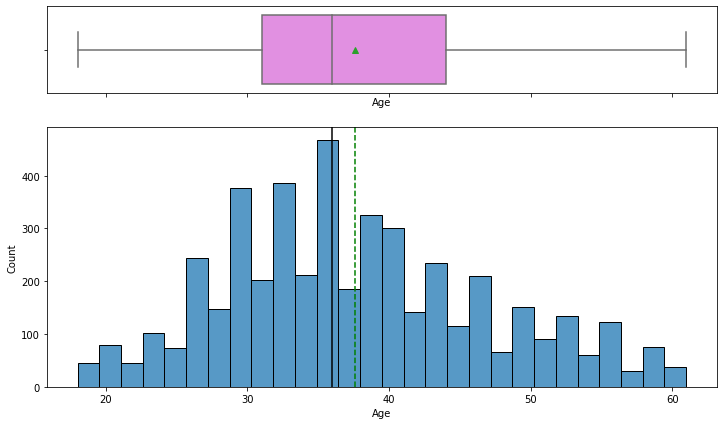

In [62]:

histogram_boxplot(data,'Age')

* Age is looking normally distributed, with a hint of right skew.

### Observations on DailyRate

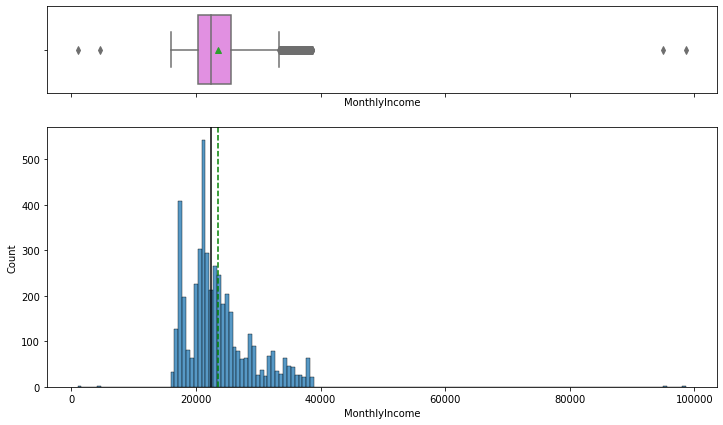

In [66]:
histogram_boxplot(data,'MonthlyIncome')

* The daily rate has a fairly uniform distribution with a mean and median at 800.

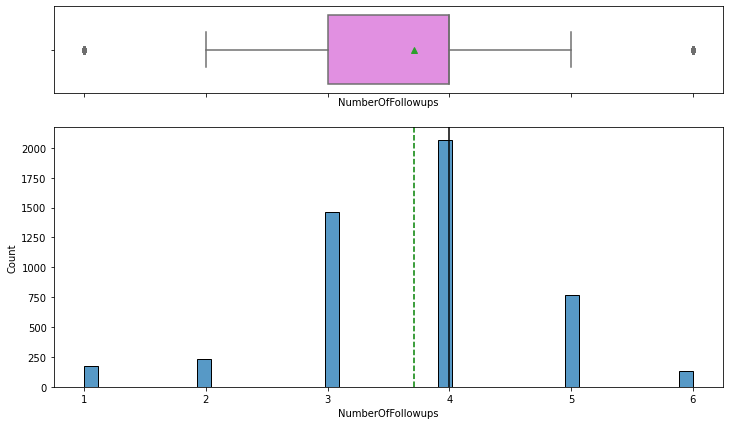

In [73]:
histogram_boxplot(data,'NumberOfFollowups')

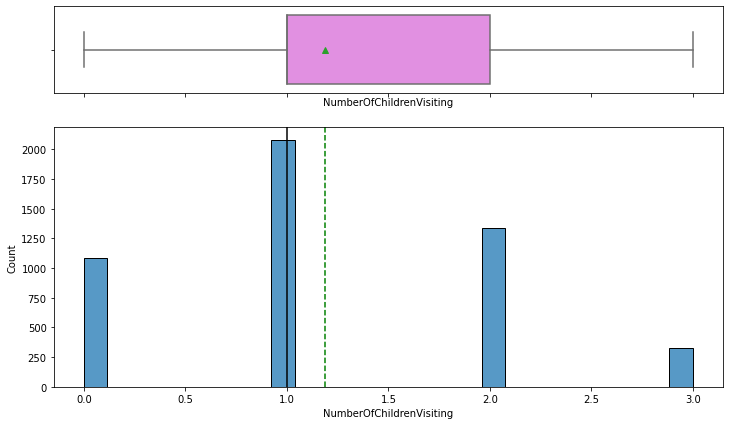

In [75]:
histogram_boxplot(data,'NumberOfChildrenVisiting')

* Salary hike is Right skewed. We shall check later if the hike percentage is a function of performance rating or job level. 
* Mean percentage salary hike is 15%.

### Observations on TotalWorkingYears

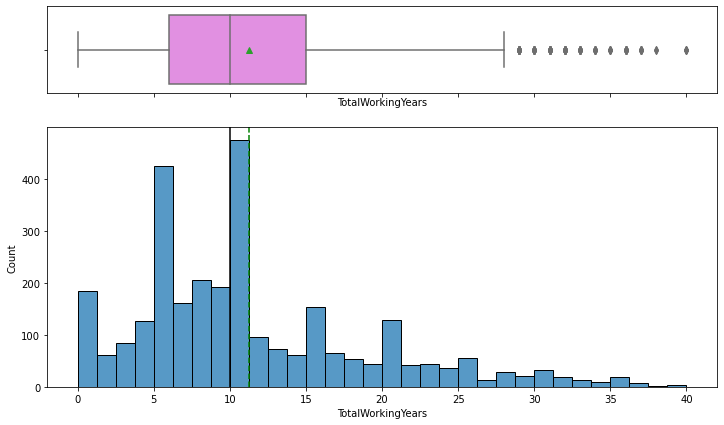

In [225]:
histogram_boxplot(data,'TotalWorkingYears')

* Age of the employees had a hint of right skew but work experience has a significant right skew.
* From the boxplot, we can observe that this variable contains a few outliers also.

### Observations on YearsWithCurrManager

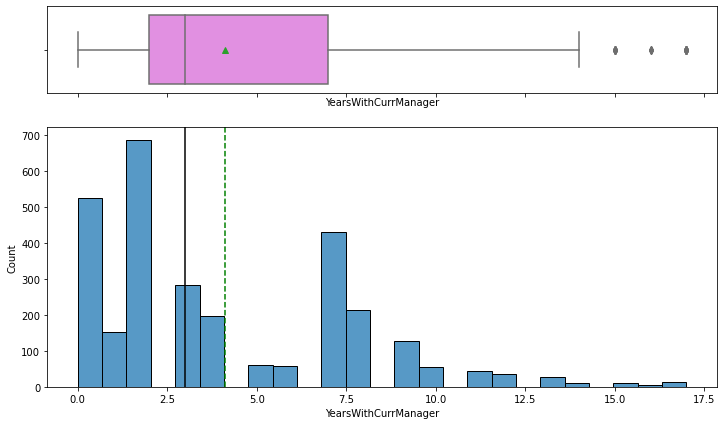

In [229]:
histogram_boxplot(data,'YearsWithCurrManager')

* This distribution is very similar to that of 'Years in current role' and that makes sense.
* There are a few outliers in this variable. 

In [77]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### Observations on BusinessTravel

Index(['CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier',
       'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')


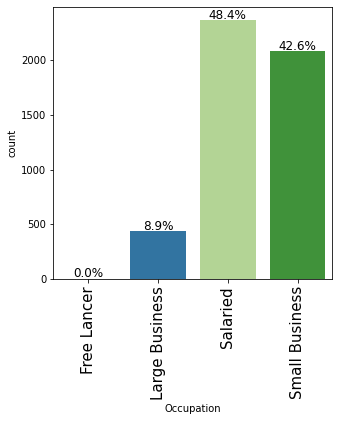

In [80]:
print(data.columns)
labeled_barplot(data, "Occupation", perc=True)

* 71% of the employees have travel rarely and 18.8% employees have to travel frequently.

### Observations on CityTier

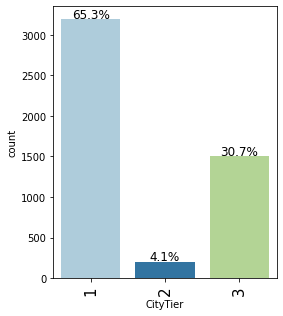

In [81]:
labeled_barplot(data, "CityTier", perc=True)

* 65.4% of employees in data are from R&D department followed by 30.3% in sales.

### Observations on NumberOfTrips

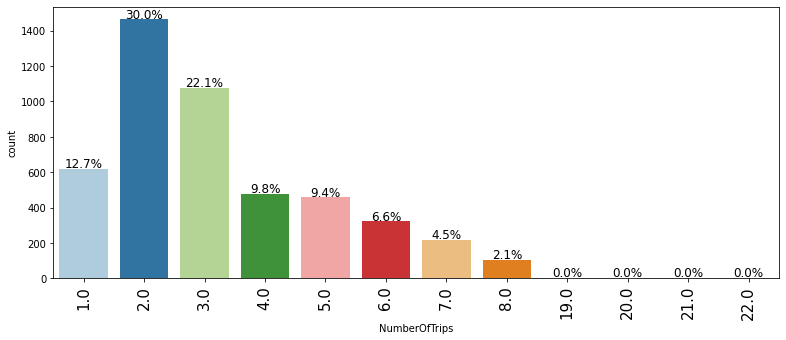

In [82]:
labeled_barplot(data, "NumberOfTrips", perc=True)

### Observations on NumberOfChildrenVisiting

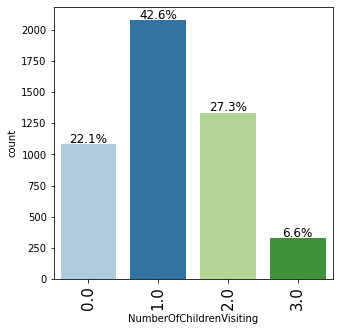

In [41]:
labeled_barplot(data, "NumberOfChildrenVisiting", perc=True)

### Observations on ProdTaken,TypeofContact

Index(['CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier',
       'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')


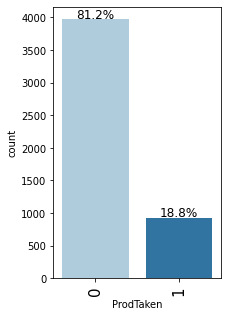

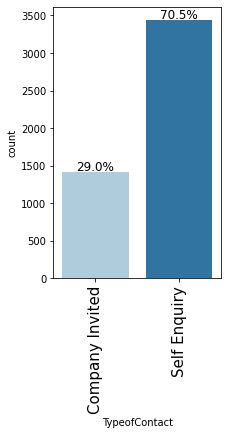

In [86]:
print(data.columns)
labeled_barplot(data, "ProdTaken", perc=True)
labeled_barplot(data, "TypeofContact", perc=True)

### Observations on MaritalStatus

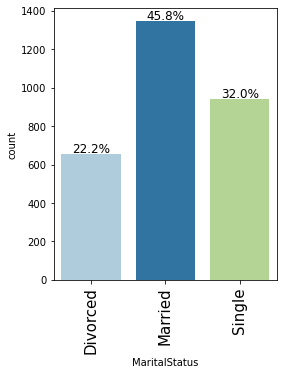

In [236]:
labeled_barplot(data, "MaritalStatus", perc=True)

* 45.8% of the employees are married followed by 32% singles.

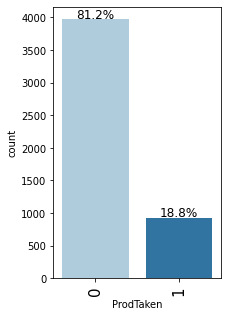

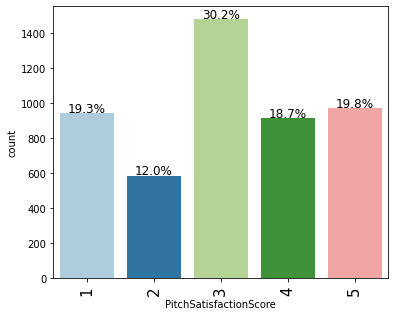

In [88]:
labeled_barplot(data, "ProdTaken", perc=True)
labeled_barplot(data, "PitchSatisfactionScore", perc=True)

### Observations on OverTime

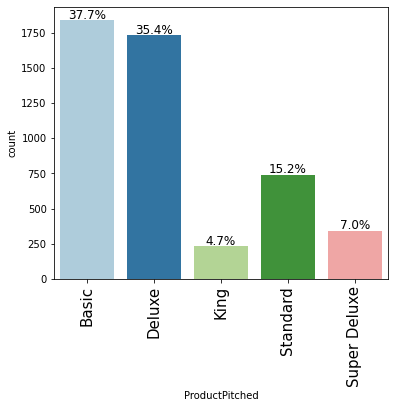

In [160]:
labeled_barplot(data, "ProductPitched", perc=True)

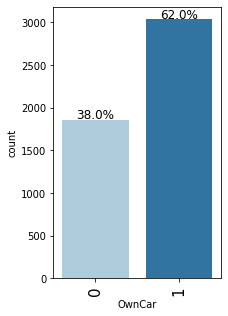

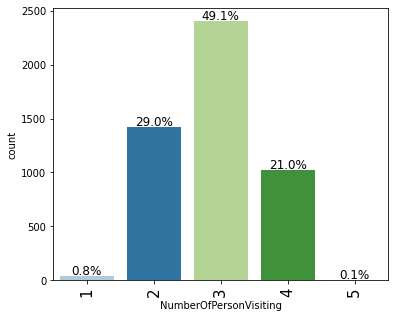

In [89]:
labeled_barplot(data, "OwnCar", perc=True)
labeled_barplot(data, "NumberOfPersonVisiting", perc=True)

## Bivariate Analysis

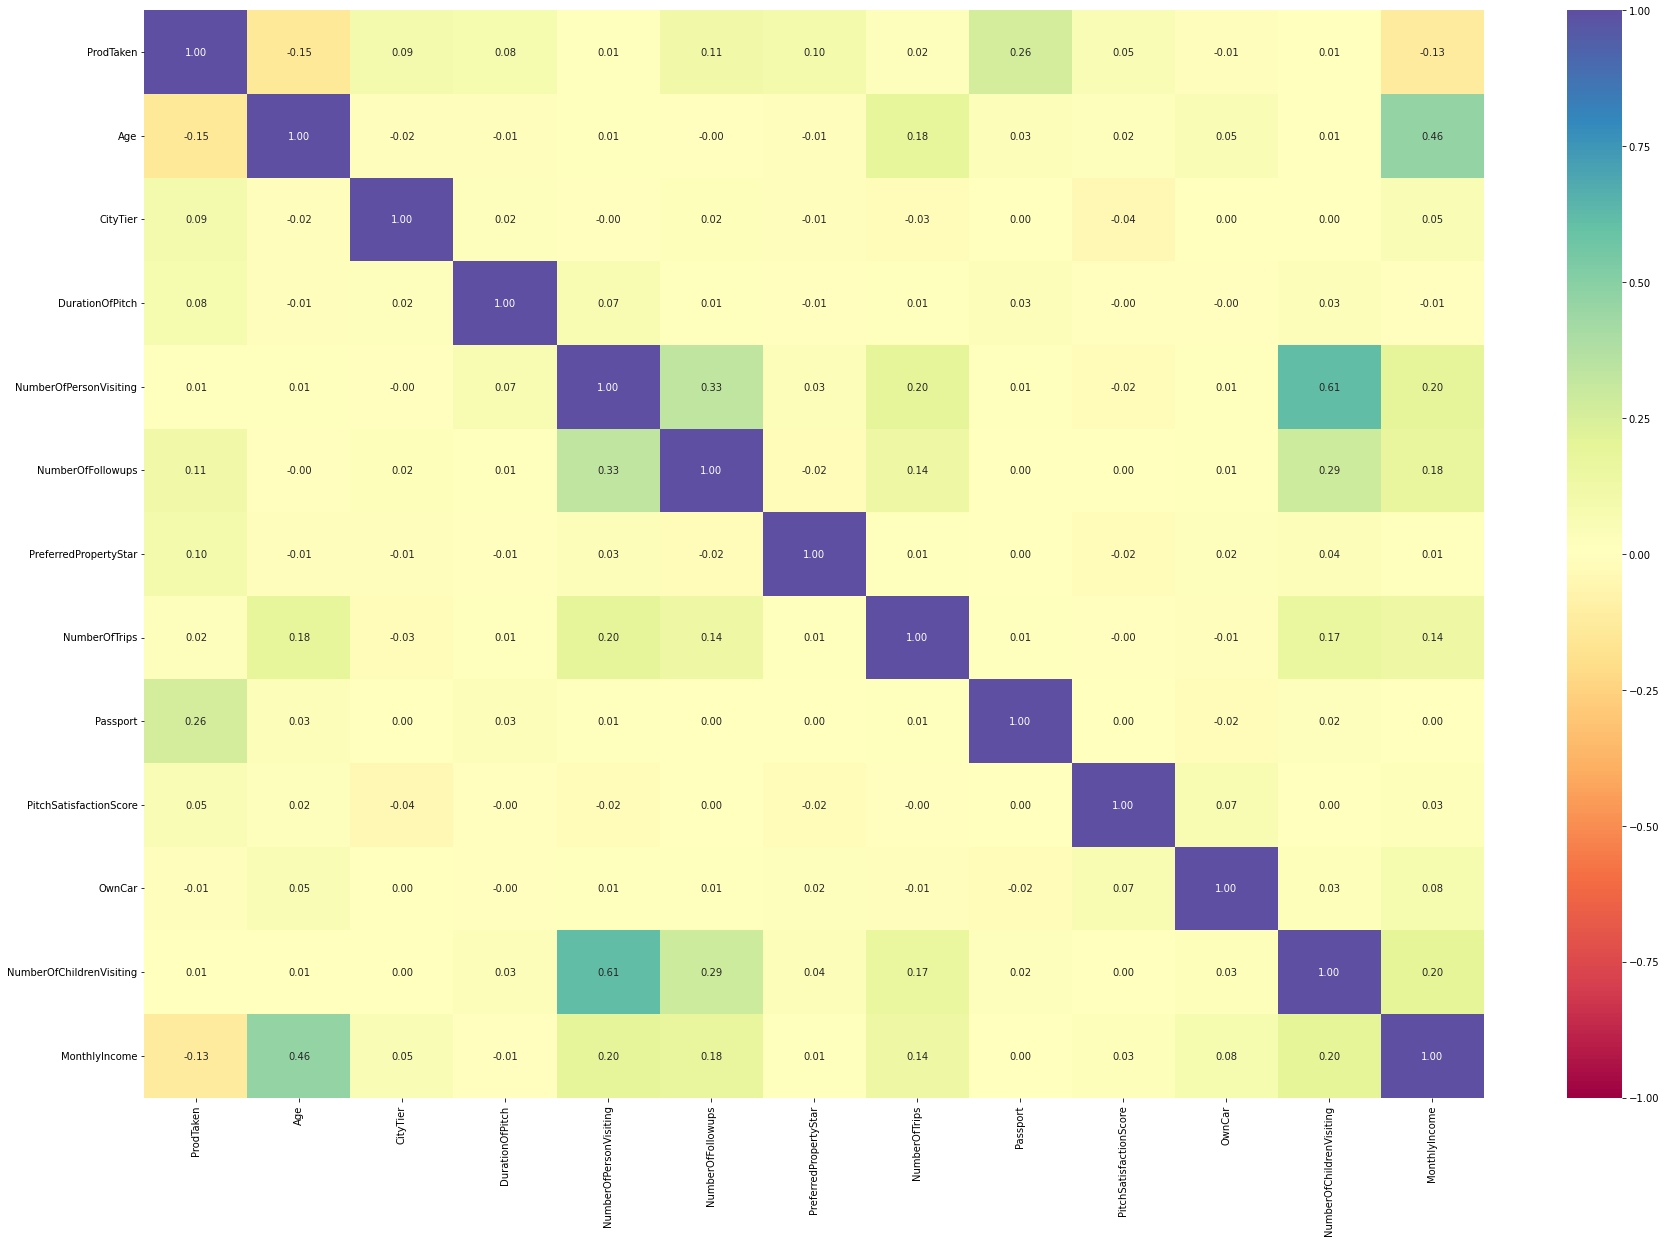

In [120]:
plt.figure(figsize=(30,20))
sns.heatmap(data.corr(),annot=True,vmin=-1,vmax=1,fmt='.2f',cmap="Spectral")
plt.show()

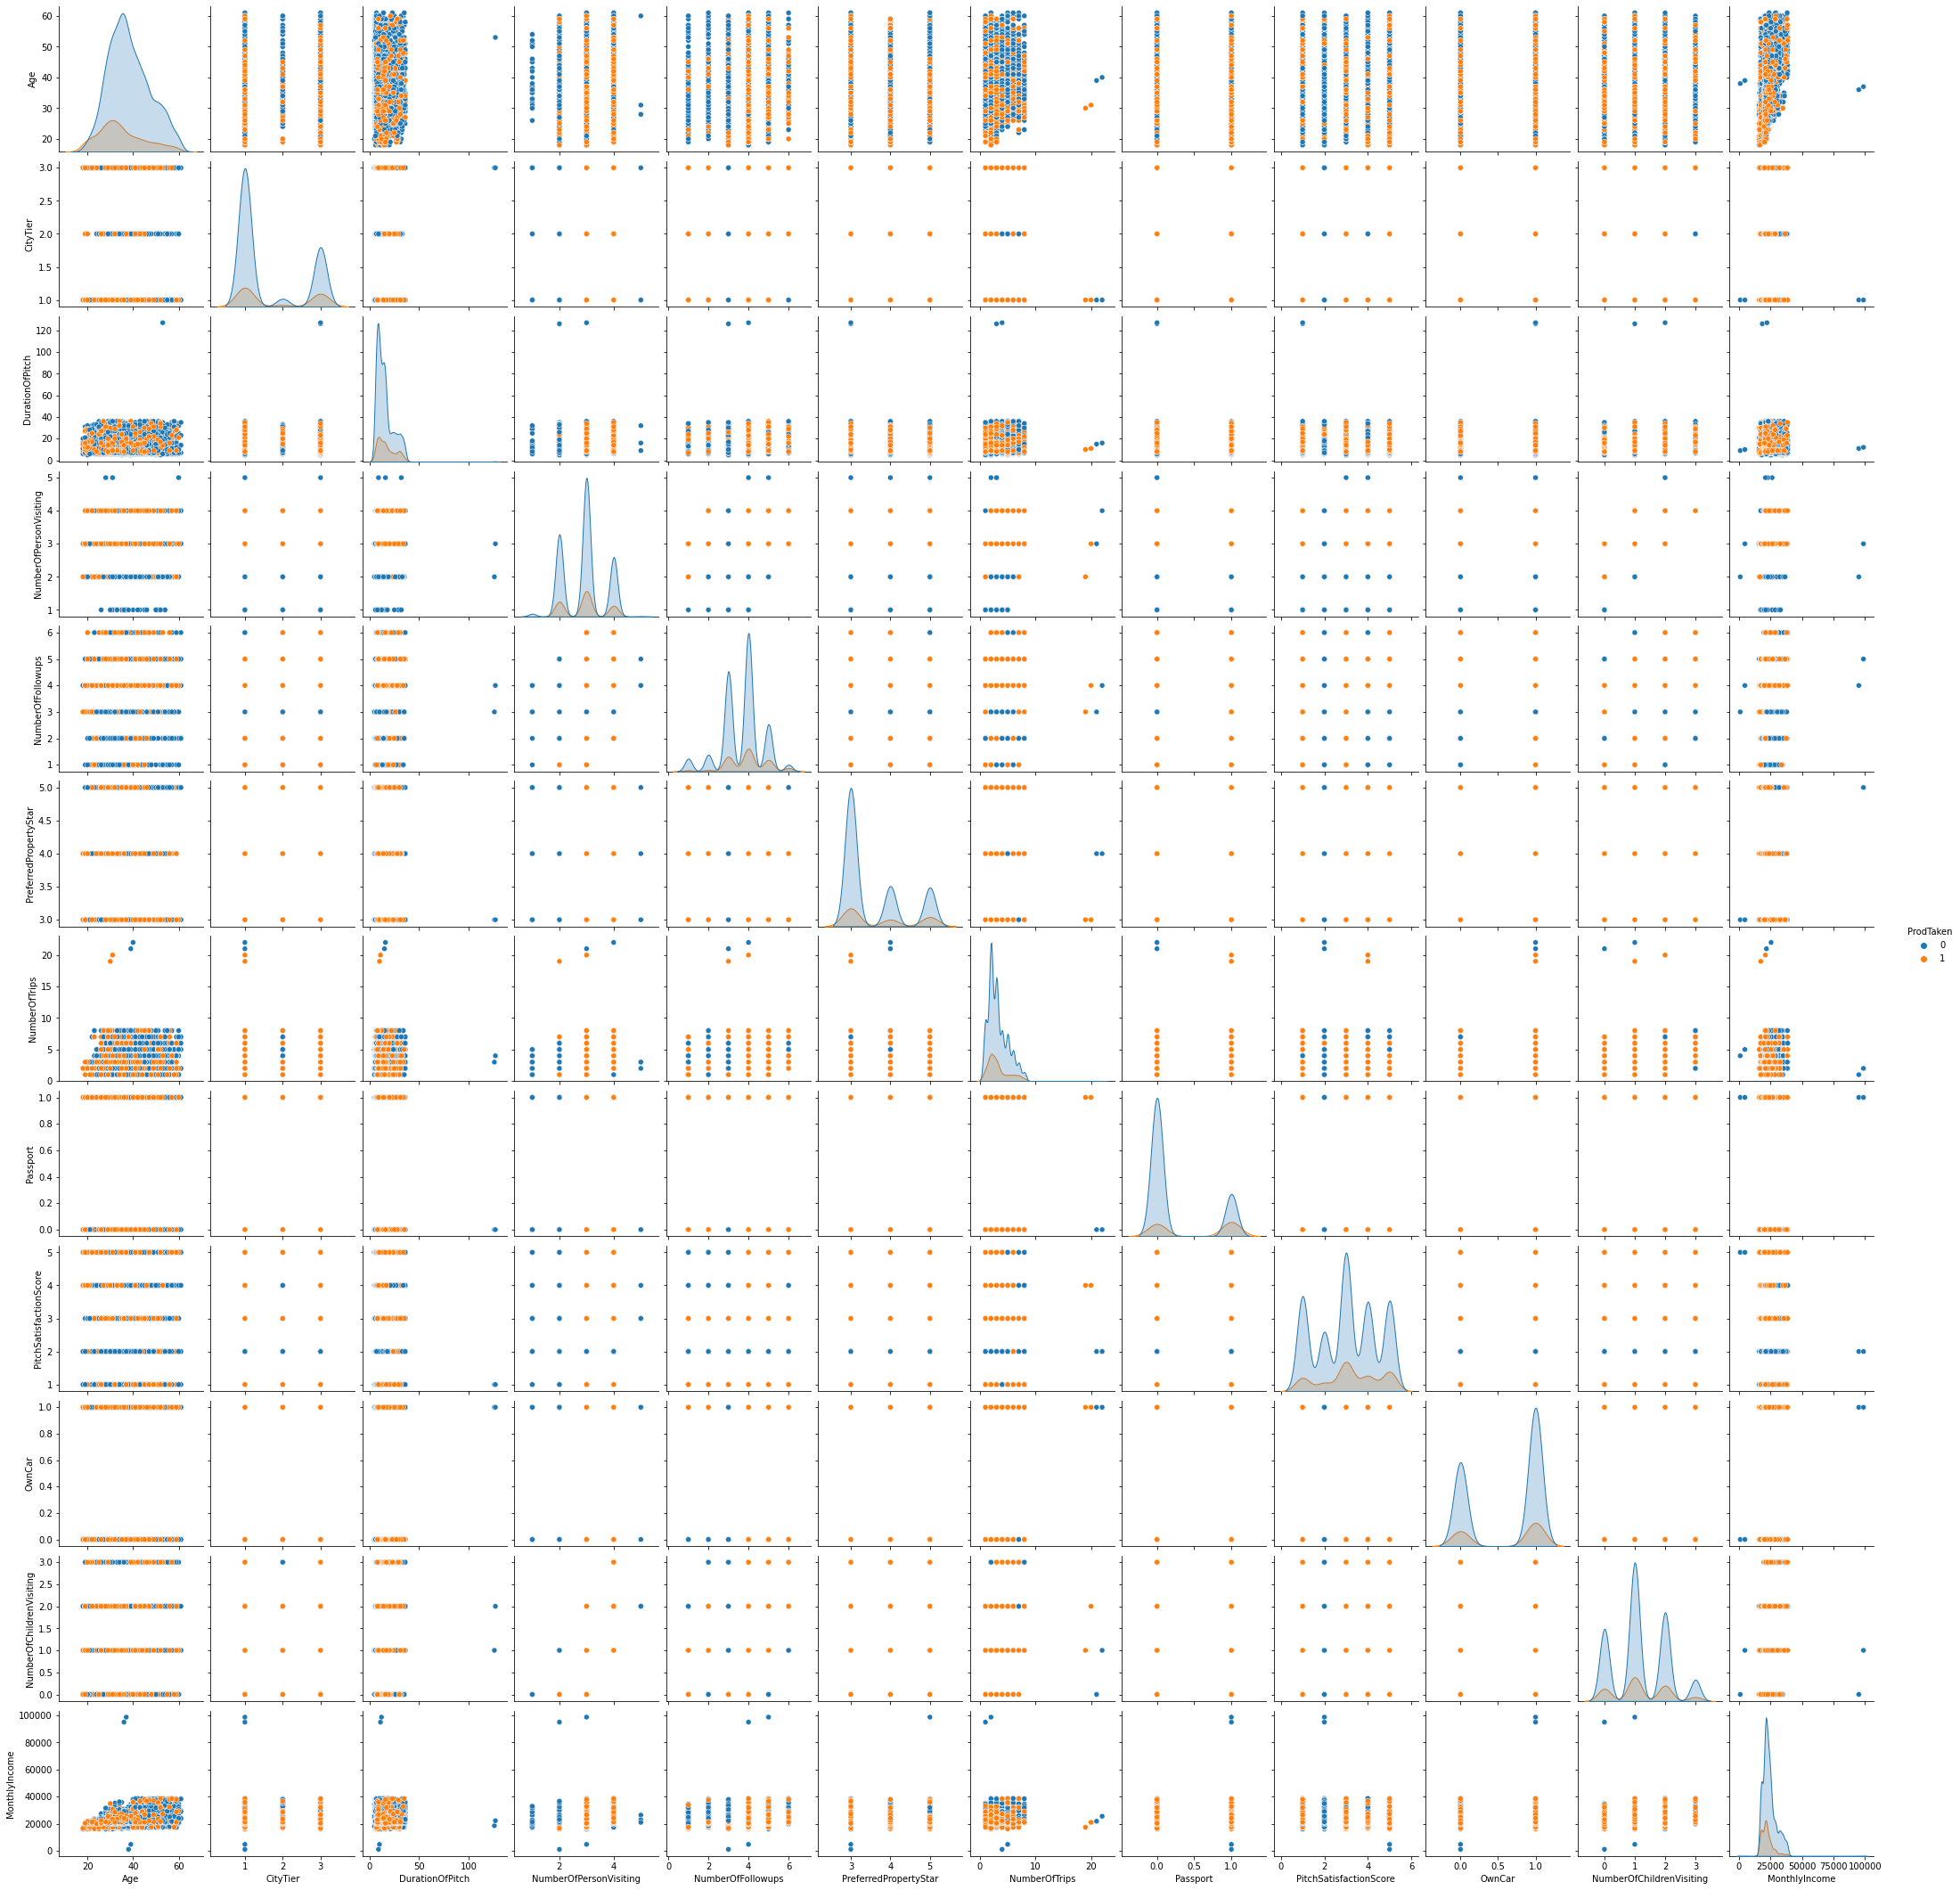

In [119]:
sns.pairplot(data,hue='ProdTaken')
plt.show()

### Attrition vs Earnings of employee

In [150]:
data.columns

Index(['ProdTaken', 'Age', 'TypeofContact', 'CityTier', 'DurationOfPitch',
       'Occupation', 'Gender', 'NumberOfPersonVisiting', 'NumberOfFollowups',
       'ProductPitched', 'PreferredPropertyStar', 'MaritalStatus',
       'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

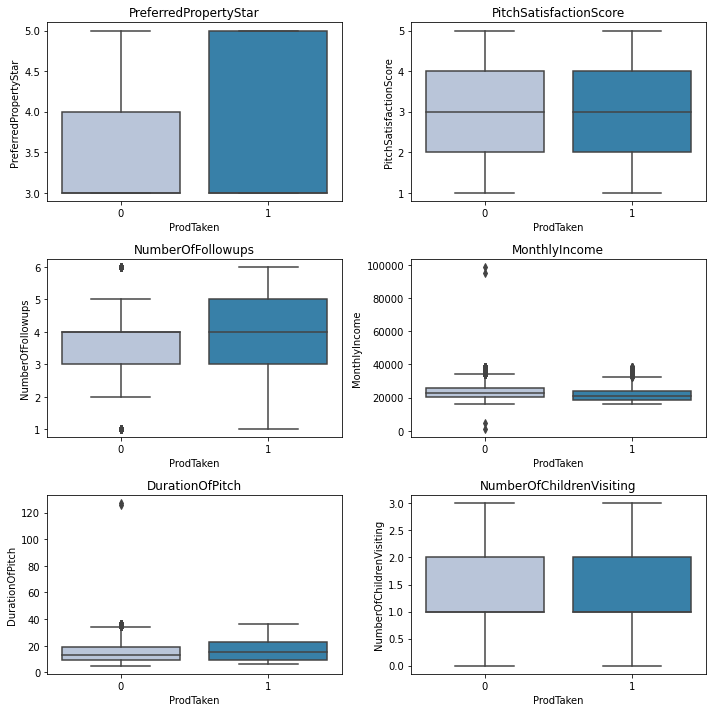

In [162]:
cols = data[['PreferredPropertyStar', 'PitchSatisfactionScore','NumberOfFollowups','MonthlyIncome','DurationOfPitch','NumberOfChildrenVisiting']].columns.tolist()
plt.figure(figsize=(10,10))

for i, variable in enumerate(cols):
                     plt.subplot(3,2,i+1)
                     sns.boxplot(data["ProdTaken"],data[variable],palette="PuBu")
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

In [135]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

ProdTaken     0    1   All
Passport                  
All        3968  920  4888
1           928  494  1422
0          3040  426  3466
------------------------------------------------------------------------------------------------------------------------


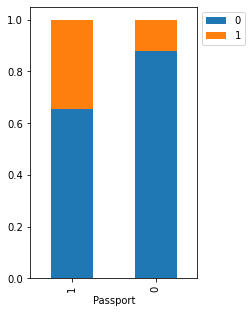

In [140]:

stacked_barplot(data, "Passport", "ProdTaken")

In [146]:
data.columns

Index(['ProdTaken', 'Age', 'TypeofContact', 'CityTier', 'DurationOfPitch',
       'Occupation', 'Gender', 'NumberOfPersonVisiting', 'NumberOfFollowups',
       'ProductPitched', 'PreferredPropertyStar', 'MaritalStatus',
       'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

ProdTaken     0    1   All
Gender                    
All        3968  920  4888
Male       2338  578  2916
Female     1630  342  1972
------------------------------------------------------------------------------------------------------------------------


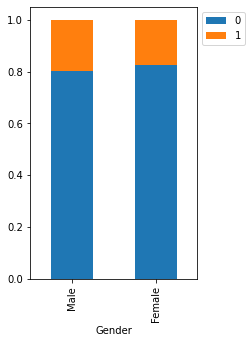

ProdTaken                 0    1   All
PreferredPropertyStar                 
All                    3948  914  4862
3.0                    2511  482  2993
5.0                     706  250   956
4.0                     731  182   913
------------------------------------------------------------------------------------------------------------------------


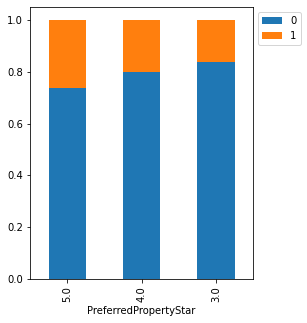

In [167]:

stacked_barplot(data,"Gender","ProdTaken")
stacked_barplot(data,"PreferredPropertyStar","ProdTaken")

* 25% of employees educated in human resources attrite.
* Attrition probability is also high in the case of marketing and technical degree holders.

In [157]:
data.columns

Index(['ProdTaken', 'Age', 'TypeofContact', 'CityTier', 'DurationOfPitch',
       'Occupation', 'Gender', 'NumberOfPersonVisiting', 'NumberOfFollowups',
       'ProductPitched', 'PreferredPropertyStar', 'MaritalStatus',
       'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

ProdTaken          0    1   All
Designation                    
All             3968  920  4888
Executive       1290  552  1842
Manager         1528  204  1732
Senior Manager   618  124   742
AVP              322   20   342
VP               210   20   230
------------------------------------------------------------------------------------------------------------------------


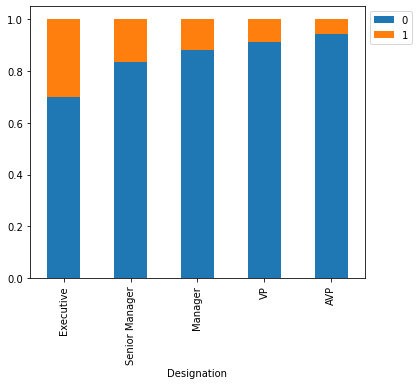

In [158]:
stacked_barplot(data,"Designation","ProdTaken")

ProdTaken          0    1   All
ProductPitched                 
All             3968  920  4888
Basic           1290  552  1842
Deluxe          1528  204  1732
Standard         618  124   742
King             210   20   230
Super Deluxe     322   20   342
------------------------------------------------------------------------------------------------------------------------


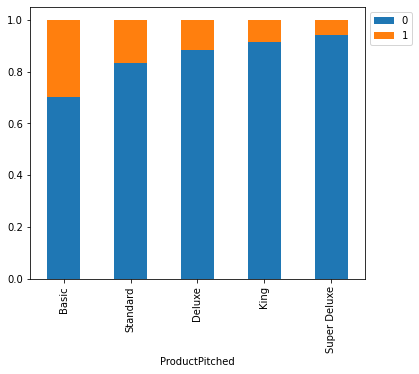

In [166]:
# data.columns
stacked_barplot(data,"ProductPitched","ProdTaken")

* Singles attrite more than married and divorced employees.
* One of the reasons here can be that single employees are younger and tend to explore different jobs.

ProdTaken          0    1   All
Occupation                     
All             3968  920  4888
Salaried        1954  414  2368
Small Business  1700  384  2084
Large Business   314  120   434
Free Lancer        0    2     2
------------------------------------------------------------------------------------------------------------------------


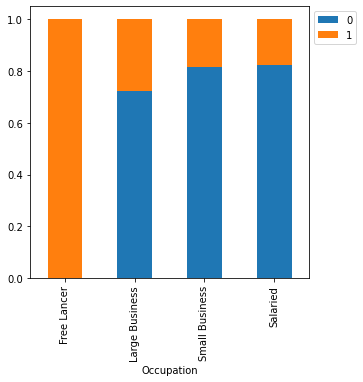

ProdTaken     0    1   All
Age                       
All        3786  876  4662
29.0        121   57   178
30.0        151   48   199
34.0        167   44   211
31.0        162   41   203
33.0        149   40   189
32.0        157   40   197
26.0         69   37   106
35.0        203   34   237
27.0        108   30   138
36.0        204   27   231
28.0        121   26   147
20.0         13   25    38
41.0        131   24   155
37.0        161   24   185
40.0        123   23   146
21.0         18   23    41
19.0         11   21    32
25.0         54   20    74
42.0        122   20   142
24.0         38   18    56
45.0         98   18   116
44.0         88   17   105
51.0         73   17    90
38.0        161   15   176
22.0         31   15    46
39.0        136   14   150
52.0         54   14    68
23.0         33   13    46
47.0         76   12    88
56.0         46   12    58
50.0         74   12    86
59.0         32   12    44
58.0         20   11    31
48.0         54   11    65
4

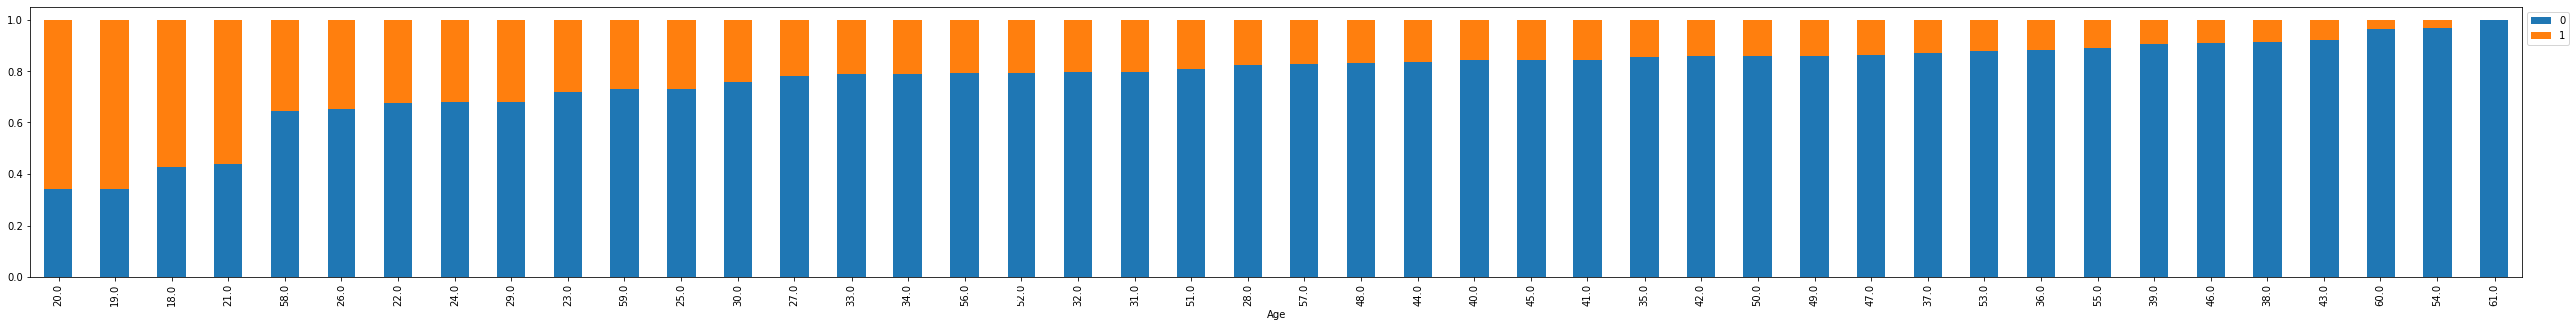

In [174]:
stacked_barplot(data,"Occupation","ProdTaken")
stacked_barplot(data,"Age","ProdTaken")

In [175]:
data.columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ProdTaken                 4888 non-null   int64   
 1   Age                       4662 non-null   float64 
 2   TypeofContact             4863 non-null   category
 3   CityTier                  4888 non-null   int64   
 4   DurationOfPitch           4637 non-null   float64 
 5   Occupation                4888 non-null   category
 6   Gender                    4888 non-null   object  
 7   NumberOfPersonVisiting    4888 non-null   int64   
 8   NumberOfFollowups         4843 non-null   float64 
 9   ProductPitched            4888 non-null   category
 10  PreferredPropertyStar     4862 non-null   float64 
 11  MaritalStatus             4888 non-null   category
 12  NumberOfTrips             4748 non-null   float64 
 13  Passport                  4888 non-null   int64 

### <a id='link1'>Summary of EDA</a>
**Data Description:**

* Freelancers are buying the products over salaried
* People are buying basic more over deluxe
* Executive are buying the product
* Preferred Property star higher has more conversion rate for product
* There is positive corelation between monthly income, number of visits and num of children with buying product
* Age plays a factor in travel. Young people travel more and purchase more product.


* The dataset has 2940 rows and 35 columns of data.
* There are no null values in the dataset.
* Attrition, BusinessTravel, Department, EducationField, Gender, JobRole, MaritalStatus, Over18, OverTime are of object data type while others are of integer data type.

**Data Cleaning:**

* CustomerID variable is not useful for predictive modeling.
* Gender has issues 'Female'

**Observations from EDA:**

* `age`: The variable Age is normally distributed with an average equal to 37 years. Age is positively correlated JobLevel and Education (i.e., the older an employee is, the more educated and at a higher job level they are).
* `DailyRate`: It is having a fairly uniform distribution with an average of 800. Employees having lower Daily rates and less monthly wage are more likely to attrite.
* `DistanceFromHome`: This shows a right-skewed distribution. Most people stay at a close distance from home with few also leaving away from work. Employees who have to travel a more distance from their home attrite more.
* `HourlyRate`: It is an almost uniformly distributed variable. It has mean and median approx equal to 65. The hourly rate doesn't have much impact on attrition.
* `MonthlyIncome`: Monthly Income distribution is almost right-skewed. Few employees are earning much higher than the rest of the employees.  MonthlyIncome is highly correlated to Job Level (0.95). 
* `MonthlyRate`: It is a uniformly distributed variable with a median close to 14500. The monthly rate doesn't have much impact on attrition.
* `NumCompaniesWorked`: On average people have worked at 2.5 companies with a median of 2 companies. The majority of people have worked in only one company. Approx 350 people are freshers. There are employees worked at 9 companies. They will be the outliers.
* `PercentSalaryHike`:  It has a right-skewed distribution. It is correlated with performance rating with a coefficient of 0.77. Lesser salary hike also contributes to attrition.
* `TotalWorkingYears`: Work experience is having a significant right skew. It also contains few outliers.
* `YearsAtCompany`: Significantly skewed towards the right. Also contains outliers.
* `YearsInCurrentRole`: It is having few outliers. The lower whisker coincides with the first quartile.
* `YearsWithCurrManager`: It is a right-skewed variable with few outliers too.
* `BusinessTravel`: Almost 71% of employees have travel rarely and 19% travel frequently. As the travel frequency increases of an employee increases, the Attrition rate increases. There's a ~22% probability of employees attriting who travel frequently.
* `Department`: The R&D department consists of almost 65% of employees.
* `EducationField`:People with Life science background is dominant over others with almost 41% count.
* `Gender`: 60% of people are male while the rest are female.
* `JobRole`: Almost 22% of people are sales executives followed by 20% research scientists.
* `MaritalStatus`: Almost 46% of people are married and 32% are single.
* `OverTime`: Only almost 29% of people are ready to do overtime. Employees who work overtime tend to attrite more. There a ~35% probability of attrition among employees working overtime.
* `Attrition`: There's an imbalance in the data with 16% of the employees attriting and rest not.

 

* **Attrition vs Earnings of employee**:
    * Employees having lower Daily rates and less monthly wage are more likely to attrite.
    * Monthly rate and the hourly rate doesn't seem to have any effect on attrition.
    * Lesser salary hike also contributes to attrition.

* **Attrition vs Years working in company**
    * Those employees who have spent less time at a company, in a current role, or with a manager have higher chances of attriting.
    * Training doesn't seem to have an impact on Attrition.
    
* **Attrition vs Previous job roles**
    * Employees who have worked in more companies generally tend to switch more jobs hence attriting.
    * Employees who attrite generally have lesser years of experience.

*  **Attrition vs Department, Job Role and Education**
    * Majority of the employees work for the R&D department. The probability of attrition is least there.
    * Both Sales and HR have similar Attrition probability.
    * Sales Executives have an attrition probability of >40%.
    * Laboratory Technicians and Human Resource personnel also have high probabilities of attrition.
    * Attrition probability among Research Directors, Manufacturing directors Healthcare representatives, and Managers are much lower than the average attrition probability of 16%.
    * 25% of employees educated in human resources attrite.
    * Attrition probability is also high in the case of marketing and technical degree holders.


* Employees who say they have low satisfaction with their work environments are likely to attrite.
* There's a ~40% probability of attrition among employees with low ratings for environment satisfaction.

* Job Involvement looks like a very strong indicator of attrition.
* Higher the job involvement, greater is the chance that the employee will stay with us and not attrite.
* Employees unhappy with their job involvement have ~55% probability of attriting (those who rated 0 and 1).
* Further investigation to understand how this variable was collected will give more insights.

* Salary hikes are a function of Performance ratings.
* We have to investigate why the employees who get Excellent(3) and Outstanding(4) Performance rating attrite and how then can they be retained.

## Model Building - Approach
1. Data preparation
2. Partition the data into train and test set.
3. Build model on the train data.
4. Tune the model if required.
5. Test the data on test set.

## Split Data

* When classification problems exhibit a significant imbalance in the distribution of the target classes, it is good to use stratified sampling to ensure that relative class frequencies are approximately preserved in train and test sets. 
* This is done using the `stratify` parameter in the train_test_split function.

In [261]:
X = data.drop(['Attrition'],axis=1)
X = pd.get_dummies(X,drop_first=True)
y = data['Attrition'].apply(lambda x : 1 if x=='Yes' else 0)

In [262]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=1,stratify=y)
print(X_train.shape, X_test.shape)

(2058, 44) (882, 44)


In [263]:
y.value_counts(1)

0    0.838776
1    0.161224
Name: Attrition, dtype: float64

In [264]:
y_test.value_counts(1)

0    0.839002
1    0.160998
Name: Attrition, dtype: float64

## Model evaluation criterion

### Model can make wrong predictions as:
1. Predicting an employee will attrite and the employee doesn't attrite
2. Predicting an employee will not attrite and the employee attrites

### Which case is more important? 
* Predicting that employee will not attrite but he attrites i.e. losing on a valuable employee or asset. 

### How to reduce this loss i.e need to reduce False Negatives?
* Company wants Recall to be maximized, greater the Recall higher the chances of minimizing false negatives. Hence, the focus should be on increasing Recall or minimizing the false negatives or in other words identifying the true positives(i.e. Class 1) so that the company can provide incentives to control attrition rate especially for top-performers thereby optimizing the overall project cost in retaining the best talent.

**Let's define function to provide metric scores(accuracy,recall and precision) on train and test set and a function to show confusion matrix so that we do not have use the same code repetitively while evaluating models.**

In [265]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [266]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Build Decision Tree Model

* We will build our model using the DecisionTreeClassifier function. Using default 'gini' criteria to split. 
* If the frequency of class A is 10% and the frequency of class B is 90%, then class B will become the dominant class and the decision tree will become biased toward the dominant classes.

* In this case, we can pass a dictionary {0:0.17,1:0.83} to the model to specify the weight of each class and the decision tree will give more weightage to class 1.

* class_weight is a hyperparameter for the decision tree classifier.

In [267]:
dtree = DecisionTreeClassifier(criterion='gini',class_weight={0:0.17,1:0.83},random_state=1)

In [268]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.17, 1: 0.83}, random_state=1)

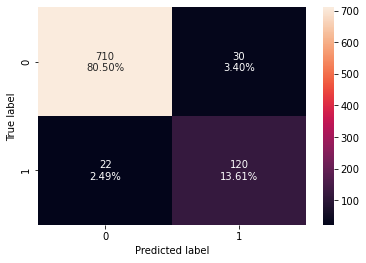

In [269]:
confusion_matrix_sklearn(dtree, X_test, y_test)

**Confusion Matrix -**

* Employee left and the model predicted it correctly that is employee will attrite :  True Positive (observed=1,predicted=1)

* Employee didn't leave and the model predicted employee will attrite : False Positive (observed=0,predicted=1)

* Employee didn't leave and the model predicted employee will not attrite : True Negative (observed=0,predicted=0)

* Employee left and the model predicted that employee won't : False Negative (observed=1,predicted=0)

In [270]:
dtree_model_train_perf=model_performance_classification_sklearn(dtree, X_train, y_train)
print("Training performance \n",dtree_model_train_perf)

Training performance 
    Accuracy  Recall  Precision   F1  ROC-AUC
0       1.0     1.0        1.0  1.0      1.0


In [271]:
dtree_model_test_perf=model_performance_classification_sklearn(dtree, X_test, y_test)
print("Testing performance \n",dtree_model_test_perf)

Testing performance 
    Accuracy   Recall  Precision        F1   ROC-AUC
0  0.941043  0.84507        0.8  0.821918  0.902265


* Decision tree is working well on the training data but is not able to generalize well on the test data concerning the recall.

### Bagging Classifier

In [272]:
bagging = BaggingClassifier(random_state=1)
bagging.fit(X_train,y_train)

BaggingClassifier(random_state=1)

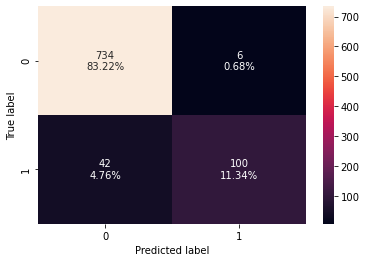

In [273]:
confusion_matrix_sklearn(bagging, X_test, y_test)

In [274]:
bagging_model_train_perf=model_performance_classification_sklearn(bagging, X_train, y_train)
print("Training performance \n",bagging_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1   ROC-AUC
0  0.993197  0.957831        1.0  0.978462  0.978916


In [275]:
bagging_model_test_perf=model_performance_classification_sklearn(bagging, X_test, y_test)
print("Testing performance \n",bagging_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1   ROC-AUC
0  0.945578  0.704225   0.943396  0.806452  0.848059


* Bagging classifier is overfitting on the training set and is performing poorly on the test set in terms of recall.

**Bagging Classifier with weighted decision tree**

In [276]:
bagging_wt = BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='gini',class_weight={0:0.17,1:0.83},random_state=1),random_state=1)
bagging_wt.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.17,
                                                                      1: 0.83},
                                                        random_state=1),
                  random_state=1)

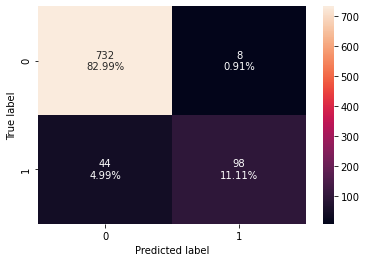

In [277]:
confusion_matrix_sklearn(bagging_wt,X_test,y_test)

In [278]:
bagging_wt_model_train_perf=model_performance_classification_sklearn(bagging_wt,X_train,y_train)
print("Training performance \n",bagging_wt_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1   ROC-AUC
0  0.992225  0.951807        1.0  0.975309  0.975904


In [279]:
bagging_wt_model_test_perf=model_performance_classification_sklearn(bagging_wt, X_test, y_test)
print("Testing performance \n",bagging_wt_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1   ROC-AUC
0  0.941043  0.690141   0.924528  0.790323  0.839665


* Bagging classifier with a weighted decision tree is giving very good accuracy and prediction but is not able to generalize well on test data in terms of recall.

### Random Forest

In [280]:
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

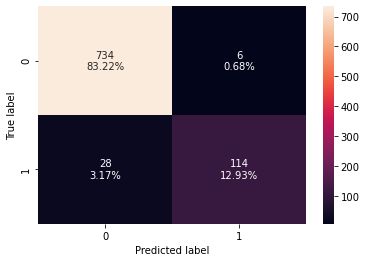

In [281]:
confusion_matrix_sklearn(rf,X_test,y_test)

In [282]:
rf_model_train_perf=model_performance_classification_sklearn(rf,X_train,y_train)
print("Training performance \n",rf_model_train_perf)

Training performance 
    Accuracy  Recall  Precision   F1  ROC-AUC
0       1.0     1.0        1.0  1.0      1.0


In [283]:
rf_model_test_perf=model_performance_classification_sklearn(rf,X_test,y_test)
print("Testing performance \n",rf_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1   ROC-AUC
0  0.961451  0.802817       0.95  0.870229  0.897354


* Random Forest has performed well in terms of accuracy and precision, but it is not able to generalize well on the test data in terms of recall.

**Random forest with class weights**

In [284]:
rf_wt = RandomForestClassifier(class_weight={0:0.17,1:0.83}, random_state=1)
rf_wt.fit(X_train,y_train)

RandomForestClassifier(class_weight={0: 0.17, 1: 0.83}, random_state=1)

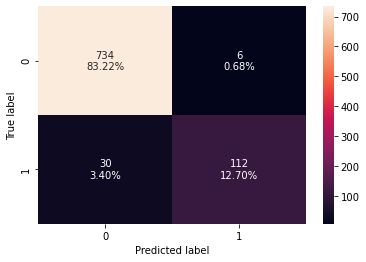

In [285]:
confusion_matrix_sklearn(rf_wt, X_test,y_test)

In [286]:
rf_wt_model_train_perf=model_performance_classification_sklearn(rf_wt, X_train,y_train)
print("Training performance \n",rf_wt_model_train_perf)

Training performance 
    Accuracy  Recall  Precision   F1  ROC-AUC
0       1.0     1.0        1.0  1.0      1.0


In [287]:
rf_wt_model_test_perf=model_performance_classification_sklearn(rf_wt, X_test,y_test)
print("Testing performance \n",rf_wt_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1   ROC-AUC
0  0.959184  0.788732   0.949153  0.861538  0.890312


* There is not much improvement in metrics of weighted random forest as compared to the unweighted random forest.

### Tuning Models

### Using GridSearch for Hyperparameter tuning model

* Hyperparameter tuning is also tricky in the sense that there is no direct way to calculate how a change in the
  hyperparameter value will reduce the loss of your model, so we usually resort to experimentation. i.e we'll use Grid search
* Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters. 
* It is an exhaustive search that is performed on a the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

**Tuning Decision Tree**

In [289]:
# Choose the type of classifier. 
dtree_estimator = DecisionTreeClassifier(class_weight={0:0.17,1:0.83},random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2,30), 
              'min_samples_leaf': [1, 2, 5, 7, 10],
              'max_leaf_nodes' : [2, 3, 5, 10,15],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.17, 1: 0.83}, max_depth=8,
                       max_leaf_nodes=15, min_impurity_decrease=0.0001,
                       min_samples_leaf=10, random_state=1)

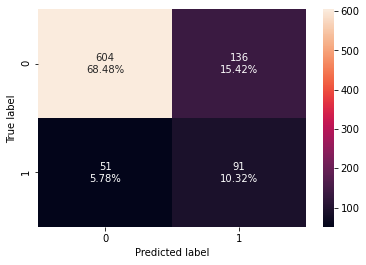

In [290]:
confusion_matrix_sklearn(dtree_estimator, X_test,y_test)

In [291]:
dtree_estimator_model_train_perf=model_performance_classification_sklearn(dtree_estimator, X_train,y_train)
print("Training performance \n",dtree_estimator_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1   ROC-AUC
0  0.819728  0.762048    0.46422  0.576967  0.796435


In [292]:
dtree_estimator_model_test_perf=model_performance_classification_sklearn(dtree_estimator, X_test, y_test)
print("Testing performance \n",dtree_estimator_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1   ROC-AUC
0  0.787982  0.640845   0.400881  0.493225  0.728531


* Overfitting in decision tree has reduced but the recall has also reduced.

**Tuning Bagging Classifier**

In [293]:
# grid search for bagging classifier
cl1 = DecisionTreeClassifier(class_weight={0:0.13,1:0.87},random_state=1)
param_grid = {'base_estimator':[cl1],
              'n_estimators':[5,7,15,51,101],
              'max_features': [0.7,0.8,0.9,1]
             }

grid = GridSearchCV(BaggingClassifier(random_state=1,bootstrap=True), param_grid=param_grid, scoring = 'recall', cv = 5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=BaggingClassifier(random_state=1),
             param_grid={'base_estimator': [DecisionTreeClassifier(class_weight={0: 0.13,
                                                                                 1: 0.87},
                                                                   random_state=1)],
                         'max_features': [0.7, 0.8, 0.9, 1],
                         'n_estimators': [5, 7, 15, 51, 101]},
             scoring='recall')

In [294]:
## getting the best estimator
bagging_estimator  = grid.best_estimator_
bagging_estimator.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.13,
                                                                      1: 0.87},
                                                        random_state=1),
                  max_features=1, n_estimators=51, random_state=1)

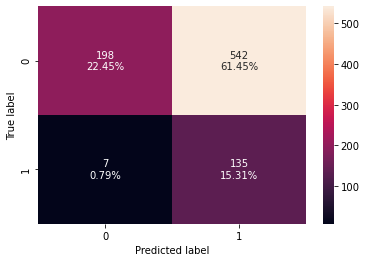

In [295]:
confusion_matrix_sklearn(bagging_estimator, X_test,y_test)

In [296]:
bagging_estimator_model_train_perf=model_performance_classification_sklearn(bagging_estimator, X_train,y_train)
print("Training performance \n",bagging_estimator_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1   ROC-AUC
0  0.396987  0.996988   0.210694  0.347872  0.639282


In [297]:
bagging_estimator_model_test_perf=model_performance_classification_sklearn(bagging_estimator, X_test, y_test)
print("Testing performance \n",bagging_estimator_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision       F1   ROC-AUC
0  0.377551  0.950704   0.199409  0.32967  0.609136


* Recall has improved but the accuracy and precision of the model has dropped drastically which is an indication that overall the model is making many mistakes.

**Tuning Random Forest**

In [298]:
# Choose the type of classifier. 
rf_estimator = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {  
        "n_estimators": [110,251,501],
        "min_samples_leaf": np.arange(1, 6,1),
        "max_features": [0.7,0.9,'log2','auto'],
        "max_samples": [0.7,0.9,None],
}

# Run the grid search
grid_obj = GridSearchCV(rf_estimator, parameters, scoring='recall',cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_estimator.fit(X_train, y_train)

RandomForestClassifier(max_features=0.9, max_samples=0.9, n_estimators=110,
                       random_state=1)

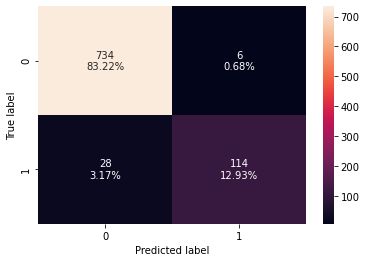

In [299]:
confusion_matrix_sklearn(rf_estimator, X_test,y_test)

In [300]:
rf_estimator_model_train_perf=model_performance_classification_sklearn(rf_estimator, X_train,y_train)
print("Training performance \n",rf_estimator_model_train_perf)

Training performance 
    Accuracy  Recall  Precision   F1  ROC-AUC
0       1.0     1.0        1.0  1.0      1.0


In [301]:
rf_estimator_model_test_perf=model_performance_classification_sklearn(rf_estimator, X_test, y_test)
print("Testing performance \n",rf_estimator_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1   ROC-AUC
0  0.961451  0.802817       0.95  0.870229  0.897354


* Random forest after tuning has given same performance as un-tuned random forest.

### Comparing all the models

In [302]:
# training performance comparison

models_train_comp_df = pd.concat(
    [dtree_model_train_perf.T,bagging_model_train_perf.T, bagging_wt_model_train_perf.T,rf_model_train_perf.T,
    rf_wt_model_train_perf.T,dtree_estimator_model_train_perf.T, bagging_estimator_model_train_perf.T,
     rf_estimator_model_train_perf.T],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Bagging Classifier",
    "Weighted Bagging Classifier",
    "Random Forest Classifier",
    "Weighted Random Forest Classifier",
    "Decision Tree Estimator",
    "Bagging Estimator",
    "Random Forest Estimator"]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree,Bagging Classifier,Weighted Bagging Classifier,Random Forest Classifier,Weighted Random Forest Classifier,Decision Tree Estimator,Bagging Estimator,Random Forest Estimator
Accuracy,1.0,0.993197,0.992225,1.0,1.0,0.819728,0.396987,1.0
Recall,1.0,0.957831,0.951807,1.0,1.0,0.762048,0.996988,1.0
Precision,1.0,1.000000,1.000000,1.0,1.0,0.464220,0.210694,1.0
F1,1.0,0.978462,0.975309,1.0,1.0,0.576967,0.347872,1.0
ROC-AUC,1.0,0.978916,0.975904,1.0,1.0,0.796435,0.639282,1.0


In [303]:
# training performance comparison

models_test_comp_df = pd.concat(
    [dtree_model_test_perf.T,bagging_model_test_perf.T, bagging_wt_model_test_perf.T,rf_model_test_perf.T,
    rf_wt_model_test_perf.T,dtree_estimator_model_test_perf.T, bagging_estimator_model_test_perf.T,
     rf_estimator_model_test_perf.T],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Bagging Classifier",
    "Weighted Bagging Classifier",
    "Random Forest Classifier",
    "Weighted Random Forest Classifier",
    "Decision Tree Estimator",
    "Bagging Estimator",
    "Random Forest Estimator"]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Decision Tree,Bagging Classifier,Weighted Bagging Classifier,Random Forest Classifier,Weighted Random Forest Classifier,Decision Tree Estimator,Bagging Estimator,Random Forest Estimator
Accuracy,0.941043,0.945578,0.941043,0.961451,0.959184,0.787982,0.377551,0.961451
Recall,0.845070,0.704225,0.690141,0.802817,0.788732,0.640845,0.950704,0.802817
Precision,0.800000,0.943396,0.924528,0.950000,0.949153,0.400881,0.199409,0.950000
F1,0.821918,0.806452,0.790323,0.870229,0.861538,0.493225,0.329670,0.870229
ROC-AUC,0.902265,0.848059,0.839665,0.897354,0.890312,0.728531,0.609136,0.897354


* Decision tree performed well on training and test set.
* Bagging classifier overfitted the data before and after tuning.
* Random Forest with default parameters performed same as after tuning - As the final results depend on the parameters used/checked using GridSearchCV, There may be yet better parameters which may result in a better performance.

### Feature importance of Random Forest

In [304]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(rf.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                        Imp
MonthlyIncome                      0.080810
OverTime_Yes                       0.059174
Age                                0.055292
DailyRate                          0.053302
TotalWorkingYears                  0.052114
HourlyRate                         0.050174
MonthlyRate                        0.048463
DistanceFromHome                   0.047056
YearsAtCompany                     0.039540
PercentSalaryHike                  0.031674
YearsWithCurrManager               0.031058
YearsInCurrentRole                 0.029408
NumCompaniesWorked                 0.029030
TrainingTimesLastYear              0.028230
EnvironmentSatisfaction            0.026136
StockOptionLevel                   0.025781
JobInvolvement                     0.025729
JobSatisfaction                    0.025468
WorkLifeBalance                    0.025087
JobLevel                           0.023950
YearsSinceLastPromotion            0.023892
Education                       

In [305]:
feature_names = X_train.columns

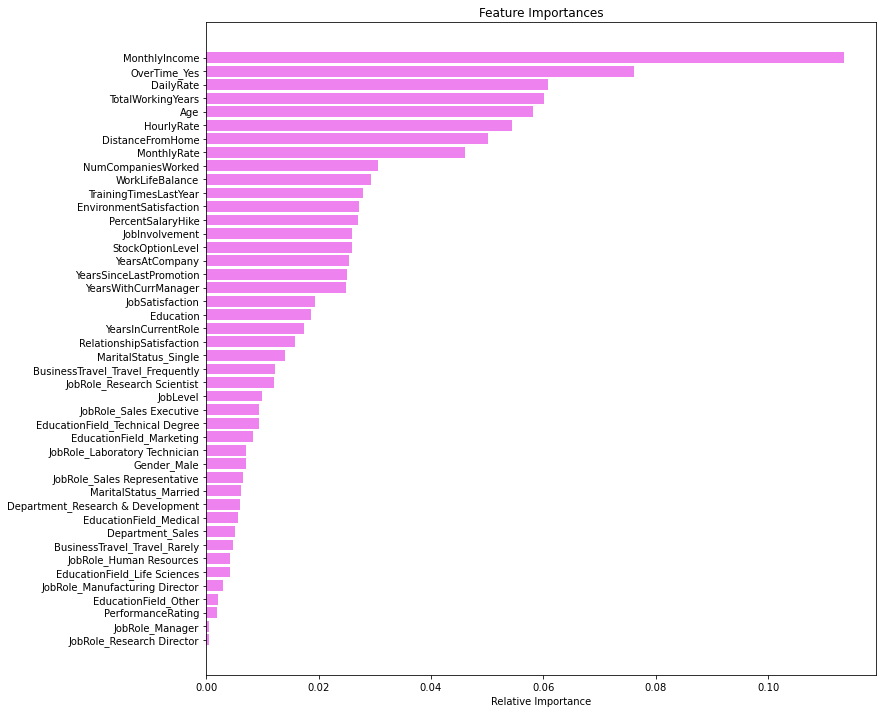

In [306]:
importances = rf_estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* Monthly income is the most important feature for prediction followed by Overtime, Daily Rate and Age.

## Business Insights and Recommendations

* We have been able to build a predictive model:
  a) that company can deploy this model to identify employees who are at the risk of attrition.
  b) that company can use to find the drivers of attrition. 
  c) based on which company can take appropriate actions to build better retention policies. 

* Factors that drive attrition - Monthly Income, Overtime, and Age.
* Monthly Income: Employees with lower income attrite more, which is also logical as they might get offers with higher pay in different organizations - the company should make sure that all employees are compensated based on industry standards.

* Overtime: Those employees who have to work overtime are the ones who attrite more - the company can provide some additional incentives to such employees to retain them.

* Age: Younger employees are the ones that attrite more- the company can make sure the new joiners have a friendly environment and better opportunities for excelling in their career.

* Distance From home is also an important factor for attrition - employees traveling more distance to reach the workplace are the ones attriting. For such employees, the company can provide cab facilities so that the commute of employees gets easier. 

* As work-related travel frequency increases, Attrition rate also increases - the company should 

* Training doesn't seem to have an impact on attrition- the company needs to investigate more here, if training does not impact employee retention then better cost planning can be done.

* Employee with more experience and the employees working for most years in the company is the loyal one's and generally do not attrite.

* Highest attrition is in the Sales department more research should go into this to check what is wrong in the sales department?

* Our data collection technique is working well as the ratings given by employees in -Environment Satisfaction, Job Satisfaction, Relationship Satisfaction, and Work-Life Balance shows a difference significant difference between attriting and non-attriting employees. These scales can act as a preliminary step to understand the dissatisfaction of employees - Lower the rating higher are the chances of attrition.